In [1]:
import gif

import altair as alt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'x': np.random.uniform(size=100),
    'y': np.random.uniform(size=100),
    't': np.arange(100) % 10
})

# matplotlib test

In [ ]:
@gif.frame
def plot_matplotlib(t):
    d = df[df['t'] == t]
    plt.scatter(d['x'], d['y'])
    plt.xlim([0, 1])
    plt.ylim([0, 1])

In [ ]:
frames = []
for t in range(10):
    frame = plot_matplotlib(t)
    frames.append(frame)
    
gif.save(frames, "test_matplotlib.gif", duration=100)

# altair test

In [3]:
@gif.frame
def plot_altair(t):
    d = df[df['t'] == t]
    chart = alt.Chart(d).encode(
        x=alt.X('x', scale=alt.Scale(domain=(0, 1))),
        y=alt.Y('y', scale=alt.Scale(domain=(0, 1)))
    ).mark_circle()
    return chart

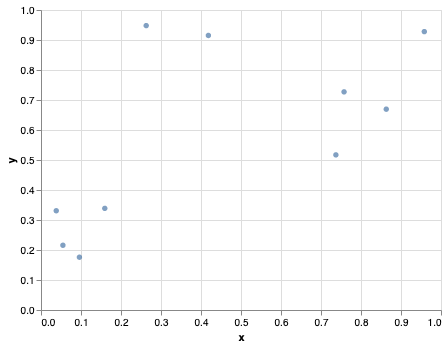

In [4]:
plot_altair(1)

In [5]:
frames = []
for t in range(10):
    frame = plot_altair(t)
    frames.append(frame)
    
gif.save(frames, "test_altair.gif", duration=100)

In [ ]:
def plot_altair(t):
    d = df[df['t'] == t]
    chart = alt.Chart(d).encode(
        x=alt.X('x', scale=alt.Scale(domain=(0, 1))),
        y=alt.Y('y', scale=alt.Scale(domain=(0, 1)))
    ).mark_circle()
    return chart

In [ ]:
from altair_saver import save 
chart = plot_altair(1)
save(chart, "test_alt.png", fmt="png")

In [ ]:
import inspect

inspect.signature(save)

In [ ]:
save

In [ ]:
import io
from PIL import Image
from altair_saver import save 


buffer = io.BytesIO()
save(chart, buffer, fmt="png")
buffer.seek(0)
image = Image.open(buffer)
image

In [ ]:
import functools
import io
from PIL import Image

def frame(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        buffer = io.BytesIO()
        chart = func(*args, **kwargs)
        save(chart, buffer, fmt='png')
        buffer.seek(0)
        image = Image.open(buffer)
        return image
    return wrapper

In [ ]:
@frame
def plot(t):
    d = df[df['t'] == t]
    chart = alt.Chart(d).encode(x='x', y='y').mark_circle()
    return chart

In [ ]:
import altair_saver

In [ ]:
altair_saver.types

In [ ]:
from altair_saver import types

In [ ]:
def plot(t):
    d = df[df['t'] == t]
    chart = alt.Chart(d).encode(x='x', y='y').mark_circle()
    return chart

In [ ]:
'altair' in str(type(plot(1)))

In [ ]:
frames = []
for t in range(10):
    frame = plot(t)
    frames.append(frame)

In [ ]:
duration = 100
path = 'chart_alt.gif'
frames[0].save(
    path,
    save_all=True,
    append_images=frames[1:],
    optimize=True,
    duration=duration,
    loop=0,
)